# # Import Python Packages

In [1]:
import swat
import pandas as pd
from matplotlib import pyplot as plt
swat.options.cas.print_messages = True

In [2]:
# # Connect to the SAS Viya CAS Server

cashost='eecucs05.unx.sas.com'
casport=5570
casauth='~/_authinfo'
conn = swat.CAS(cashost, casport, authinfo=casauth, caslib="casuser")

In [3]:
conn.serverstatus()

NOTE: Grid node action status report: 28 nodes, 8 total actions executed.


[About]

 {'CAS': 'Cloud Analytic Services',
  'Version': '3.04',
  'VersionLong': 'V.03.04M0P07112018',
  'Copyright': 'Copyright © 2014-2018 SAS Institute Inc. All Rights Reserved.',
  'ServerTime': '2020-08-26T08:13:58Z',
  'System': {'Hostname': 'eecucs05',
   'OS Name': 'Linux',
   'OS Family': 'LIN X64',
   'OS Release': '2.6.32-696.el6.x86_64',
   'OS Version': '#1 SMP Tue Feb 21 00:53:17 EST 2017',
   'Model Number': 'x86_64',
   'Linux Distribution': 'Red Hat Enterprise Linux Server release 6.9 (Santiago)'},
  'license': {'site': 'DEMO CENTER',
   'siteNum': 70242140,
   'expires': '31Dec2020:00:00:00',
   'gracePeriod': 45,
   'warningPeriod': 45,
   'maxCPUs': 192}}

[server]

 Server Status
 
    nodes  actions
 0     28        8

[nodestatus]

 Node Status
 
                     name        role  uptime  running  stalled
 0   eecucs06.unx.sas.com      worker  11.250        0        0
 1   eecucs07.unx.sas.com      worker  11.250        0        0
 2   eecucs08.unx.sas.com      worker  11.249        0        0
 3   eecucs09.unx.sas.com      worker  11.249        0        0
 4   eecucs10.unx.sas.com      worker  11.250        0        0
 5   eecucs11.unx.sas.com      worker  11.250        0        0
 6   eecucs12.unx.sas.com      worker  11.249        0        0
 7   eecucs13.unx.sas.com      worker  11.249        0        0
 8   eecucs14.unx.sas.com      worker  11.250        0        0
 9   eecucs15.unx.sas.com      worker  11.250        0        0
 10  eecucs16.unx.sas.com      worker  11.249        0        0
 11  eecucs17.unx.sas.com      worker  11.249        0        0
 12  eecucs18.unx.sas.com      worker  11.250        0        0
 13  eecucs19.unx.sas.com      worker  11.250        0        0
 14  eecucs20.unx.sas.com      worker  11.250        0        0
 15  eecucs21.unx.sas.com      worker  11.250        0        0
 16  eecucs22.unx.sas.com      worker  11.249        0        0
 17  eecucs23.unx.sas.com      worker  11.249        0        0
 18  eecucs24.unx.sas.com      worker  11.249        0        0
 19  eecucs25.unx.sas.com      worker  11.250        0        0
 20  eecucs26.unx.sas.com      worker  11.249        0        0
 21  eecucs27.unx.sas.com      worker  11.249        0        0
 22  eecucs28.unx.sas.com      worker  11.249        0        0
 23  eecucs29.unx.sas.com      worker  11.249        0        0
 24  eecucs30.unx.sas.com      worker  11.249        0        0
 25  eecucs31.unx.sas.com      worker  11.250        0        0
 26  eecucs32.unx.sas.com      worker  11.250        0        0
 27  eecucs05.unx.sas.com  controller  11.282        0        0

+ Elapsed: 0.0143s, user: 0.031s, sys: 0.047s, mem: 5.73mb

In [4]:
#Extend Session to 12 hours not to lose the datasets that you haven't explicitly saved 

mytime = 60*60*12
conn.session.timeout(time=mytime)
conn.session.sessionStatus()

[state]

 'Connected'

[number of Connections]

 1

[Timeout]

 43200

[ActionStatus]

 'Action is active'

[Authenticated]

 'Yes'

[locale]

 'en_US'

+ Elapsed: 0.00825s, user: 0.028s, sys: 0.029s, mem: 5.5mb

# # Load Titanic Data Into Memory

In [11]:
titanic_tbl = conn.read_csv("titanic3_ID.csv", casout = dict(name="titanic", replace=True)) 

NOTE: Cloud Analytic Services made the uploaded file available as table TITANIC in caslib CASUSERHDFS(sukspp).
NOTE: The table TITANIC has been created in caslib CASUSERHDFS(sukspp) from binary data uploaded to Cloud Analytic Services.


In [12]:
conn.table.tableinfo()

,Name,Rows,Columns,IndexedColumns,Encoding,CreateTimeFormatted,ModTimeFormatted,AccessTimeFormatted,JavaCharSet,CreateTime,...,Global,Repeated,View,SourceName,SourceCaslib,Compressed,Creator,Modifier,SourceModTimeFormatted,SourceModTime
0,TITANIC,1309,14,0,utf-8,2020-08-26T10:11:33+01:00,2020-08-26T10:11:33+01:00,2020-08-26T10:11:33+01:00,UTF8,1.914052e+09,...,0,0,0,,,0,sukspp,,2020-08-26T10:11:32+01:00,1.914052e+09


# # In Memory Data Table, CAS Table Object Reference and a CAS Dataframe 

In [13]:
#Where is the data located? CAS Table in-memory on SAS Viya server
type(titanic_tbl)

swat.cas.table.CASTable

In [14]:
#Where is the data located? Local dataframe
type(titanic_tbl.head())

swat.dataframe.SASDataFrame

In [15]:
# # Working with CAS Results

type(titanic_tbl.tableinfo())

swat.cas.results.CASResults

In [16]:
x=titanic_tbl.tableinfo()

In [17]:
print(list(x.keys()))

['TableInfo']


In [18]:
y=x.get_tables('TableInfo')

In [19]:
type(y)

list

# # Get documentation of a swat function

In [20]:
help('swat.CAS')

Help on class CAS in swat:

swat.CAS = class CAS(builtins.object)
 |  swat.CAS(hostname=None, port=None, username=None, password=None, session=None, locale=None, nworkers=None, name=None, authinfo=None, protocol=None, **kwargs)
 |  
 |  Create a connection to a CAS server.
 |  
 |  Parameters
 |  ----------
 |  hostname : string or list-of-strings, optional
 |      Host to connect to.  If not specified, the value will come
 |      from the ``cas.hostname`` option or ``CASHOST`` environment variable.
 |  port : int or long, optional
 |      Port number.  If not specified, the value will come from the
 |      ``cas.port`` option or ``CASPORT`` environment variable.
 |  username : string, optional
 |      Name of user on CAS host.
 |  password : string, optional
 |      Password of user on CAS host.
 |  session : string, optional
 |      ID of existing session to reconnect to.
 |  locale : string, optional
 |      Name of locale used for the session.
 |  name : string, optional
 |      Us

# # Exploring the in-memory data

In [21]:
#Columns in the table
titanic_tbl.columnInfo()

,Column,ID,Type,RawLength,FormattedLength,NFL,NFD
0,pclass,1,double,8,12,0,0
1,survived,2,double,8,12,0,0
2,name,3,varchar,82,82,0,0
3,sex,4,varchar,6,6,0,0
4,age,5,double,8,12,0,0
5,sibsp,6,double,8,12,0,0
6,parch,7,double,8,12,0,0
7,ticket,8,varchar,18,18,0,0
8,fare,9,double,8,12,0,0
9,cabin,10,varchar,15,15,0,0


In [22]:
#First five rows of the table
titanic_tbl.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.00,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.92,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.00,1.0,2.0,113781,151.5500,C22 C26,S,,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1.0,2.0,113781,151.5500,C22 C26,S,,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1.0,2.0,113781,151.5500,C22 C26,S,,NaN,"Montreal, PQ / Chesterville, ON"


In [23]:
#Its the same to use CAS Action directly on the table instead of the function

conn.table.fetch(table='titanic', to=5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.00,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.92,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.00,1.0,2.0,113781,151.5500,C22 C26,S,,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1.0,2.0,113781,151.5500,C22 C26,S,,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1.0,2.0,113781,151.5500,C22 C26,S,,NaN,"Montreal, PQ / Chesterville, ON"


In [24]:
#Number of rows and columns
titanic_tbl.shape

(1309, 14)

In [25]:
#Summary statistics
titanic_tbl.describe(include=['numeric', 'character'])

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
count,1309,1309,1309,1309,1046,1309,1309,1309,1308,295,1307,486,121,745
unique,3,2,1307,2,98,7,8,929,281,186,3,27,121,369
top,3,0,"Kelly, Mr. James",male,24,0,0,CA. 2343,8.05,C23 C25 C27,S,13,328,"New York, NY"
freq,709,809,2,843,47,891,1002,11,60,6,914,39,1,64
mean,2.29488,0.381971,NaN,NaN,29.8811,0.498854,0.385027,NaN,33.2955,NaN,NaN,NaN,160.81,NaN
std,0.837836,0.486055,NaN,NaN,14.4135,1.04166,0.86556,NaN,51.7587,NaN,NaN,NaN,97.6969,NaN
min,1,0,"Abbing, Mr. Anthony",female,0.17,0,0,110152,0,A10,C,1,1,"?Havana, Cuba"
25%,2,0,NaN,NaN,21,0,0,NaN,7.8958,NaN,NaN,NaN,72,NaN
50%,3,0,NaN,NaN,28,0,0,NaN,14.4542,NaN,NaN,NaN,155,NaN
75%,3,1,NaN,NaN,39,1,0,NaN,31.275,NaN,NaN,NaN,256,NaN


# # Bring data locally to use Pandas

In [26]:
titanic_sample=titanic_tbl.sample(n=500, stratify_by='age')

In [27]:
titanic_df = titanic_tbl.to_frame()

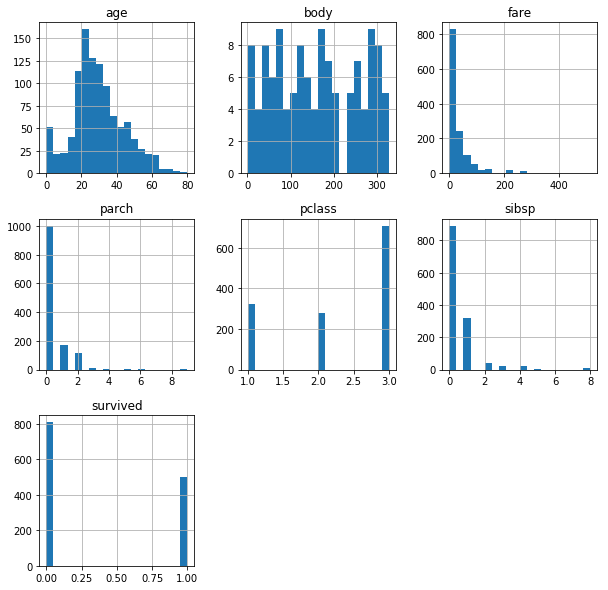

In [28]:
#Only numeric values are plotted here
titanic_df.hist(bins=20, figsize=(10,10));

In [29]:
#Some of the columns are not good for predictive modeling, we remove them from the DataFrame
titanic_df = titanic_df[['sex','age','fare','pclass','sibsp','survived']]
titanic_df.head()

,sex,age,fare,pclass,sibsp,survived
0,female,29.00,211.3375,1.0,0.0,1.0
1,male,0.92,151.5500,1.0,1.0,1.0
2,female,2.00,151.5500,1.0,1.0,0.0
3,male,30.00,151.5500,1.0,1.0,0.0
4,female,25.00,151.5500,1.0,1.0,0.0


In [30]:
#Load the dataframe back to the SAS Viya server

titanic_tbl = conn.upload_frame(titanic_df, casout = dict(name="titanic", replace=True)) 

NOTE: Cloud Analytic Services made the uploaded file available as table TITANIC in caslib CASUSERHDFS(sukspp).
NOTE: The table TITANIC has been created in caslib CASUSERHDFS(sukspp) from binary data uploaded to Cloud Analytic Services.


In [31]:
#Promote the CAS table to make it immediately available in-memory to other users in a global library

conn.promote(name=titanic_tbl, targetlib='public', target='titanic_perm') 

+ Elapsed: 0.0232s, user: 0.039s, sys: 0.072s, mem: 7.75mb

In [32]:
type(titanic_df)

swat.dataframe.SASDataFrame

In [33]:
type(titanic_tbl)

swat.cas.table.CASTable

# # VIEWING DATA AVAILABLE WITHIN A CAS LIBRARY

In [34]:
conn.tableinfo(caslib='casuser')

NOTE: No tables are available in caslib CASUSER(sukspp) of Cloud Analytic Services.


+ Elapsed: 0.0107s, user: 0.033s, sys: 0.065s, mem: 8.12mb

In [35]:
#Save the table permanently to disk

conn.table.save(table="titanic", name="titanicCopy.sashdat", caslib='casuser', replace=True)

ERROR: Could not connect to the Hadoop cluster.
ERROR: Table 'titanic' could not be loaded.
ERROR: Failure opening table 'titanic': A table could not be loaded.
ERROR: The action stopped due to errors.


+ Elapsed: 7.7e-05s, user: 0.905s, sys: 1.91s

In [44]:
#Check if the file has been permanently saved

conn.fileInfo(caslib='casuser')

,Permission,Owner,Group,Name,Size,Encryption,Time,ModTime


In [ ]:
#Terminate CAS Session to release resources 

conn.close()